# Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import datetime
import functools as ft

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 12, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

import warnings
warnings.filterwarnings('ignore')
from scipy import stats


# Loading Dataframes

In [2]:
Jinte = pd.read_csv('./datasets/Jinte.csv') 
Alice = pd.read_csv('./datasets/Alice.csv') 
Vicky = pd.read_csv('./datasets/Vicky.csv') 
Aniek = pd.read_csv('./datasets/Aniek.csv') 
Fransje = pd.read_csv('./datasets/Fransje.csv') 

Jinte.head()

,Date/Time,I:Temperature,D:Heartrate
0,2022-05-19 01:00:00,24.8,62.0
1,2022-05-19 01:01:00,24.8,62.0
2,2022-05-19 01:02:00,24.8,62.0
3,2022-05-19 01:03:00,24.7,60.0
4,2022-05-19 01:04:00,24.8,61.0


# Merging and Gouping Dataframes

In [3]:
Jinte['Sample'] = pd.Series([1 for x in range(len(Jinte.index))])
Alice['Sample'] = pd.Series([2 for x in range(len(Alice.index))])
Vicky['Sample'] = pd.Series([3 for x in range(len(Vicky.index))])
Aniek['Sample'] = pd.Series([4 for x in range(len(Aniek.index))])
Fransje['Sample'] = pd.Series([5 for x in range(len(Fransje.index))])

data_frames = [Jinte, Vicky, Fransje, Aniek] 

df_merged = pd.concat(data_frames)

# Creating graph

[Text(0.5, 1.0, 'Samples')]

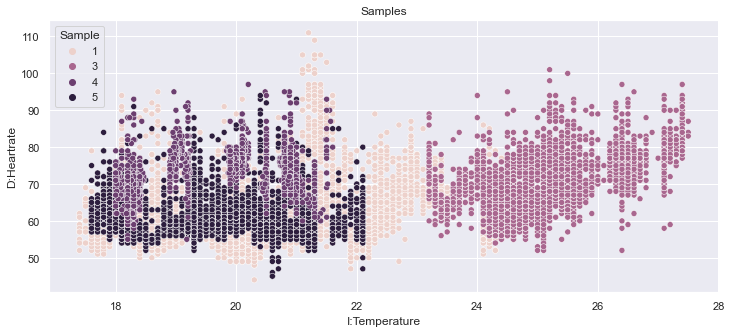

In [5]:
ax = sns.scatterplot(data=df_merged, x='I:Temperature', y='D:Heartrate', hue='Sample')
ax.set(title='Samples')

In [10]:
print(df_merged)

                Date/Time  I:Temperature  D:Heartrate  Sample  I:Humidity
0     2022-05-19 01:00:00      24.800000         62.0       1         NaN
1     2022-05-19 01:01:00      24.800000         62.0       1         NaN
2     2022-05-19 01:02:00      24.800000         62.0       1         NaN
3     2022-05-19 01:03:00      24.700000         60.0       1         NaN
4     2022-05-19 01:04:00      24.800000         61.0       1         NaN
...                   ...            ...          ...     ...         ...
2096  2022-05-31 05:56:00      18.016667         68.0       4         NaN
2097  2022-05-31 05:57:00      18.000000         67.0       4         NaN
2098  2022-05-31 05:58:00      18.000000         67.0       4         NaN
2099  2022-05-31 05:59:00      18.000000         79.0       4         NaN
2100  2022-05-31 06:00:00      18.000000         64.0       4         NaN

[15145 rows x 5 columns]


<AxesSubplot:>

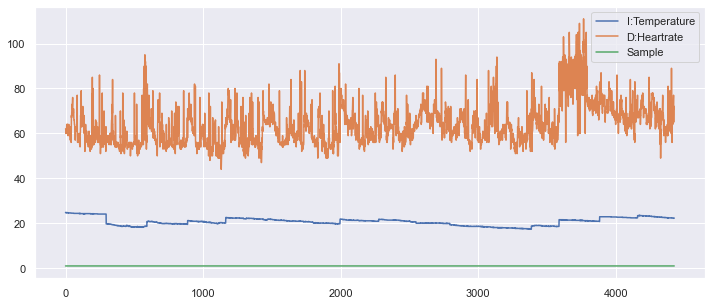

In [4]:
Jinte.plot.line()

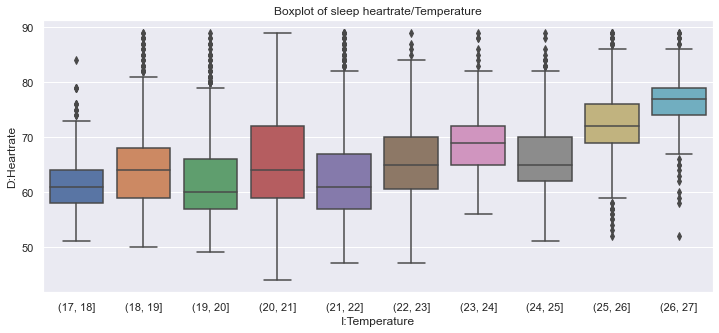

In [36]:
extrafiltered=df_merged[df_merged["D:Heartrate"]<90]

extrafiltered['z_score']=stats.zscore(extrafiltered['D:Heartrate'])
extrafiltered.loc[extrafiltered['z_score'].abs()<=1]
bins=np.arange(17, 28, 1) 
df=extrafiltered
df['bins'] = pd.cut(extrafiltered['I:Temperature'], bins=bins)
sns.boxplot(data=df, x='bins', y='D:Heartrate').set(title='Boxplot of sleep heartrate/Temperature', xlabel = "I:Temperature")
plt.savefig('./figures/final/boxoutliers.svg')
plt.savefig('./figures/final/boxoutliers.png')

<AxesSubplot:xlabel='bins'>

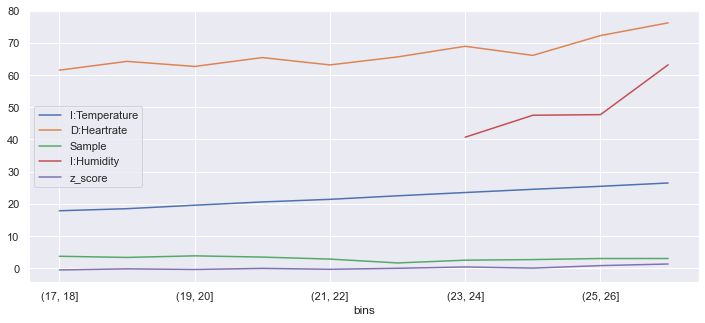

In [38]:
grouped=df.groupby(by="bins").mean()
grouped.plot.line()


In [21]:
x=extrafiltered['D:Heartrate']
q75,q25 = np.percentile(extrafiltered.loc[:,x],[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
 
extrafiltered.loc[extrafiltered[x] < min,x] = np.nan
extrafiltered.loc[extrafiltered[x] > max,x] = np.nan

KeyError: "None of [Float64Index([62.0, 62.0, 62.0, 60.0, 61.0, 60.0, 61.0, 61.0, 62.0, 64.0,\n              ...\n              63.0, 62.0, 67.0, 67.0, 66.0, 68.0, 67.0, 67.0, 79.0, 64.0],\n             dtype='float64', length=14958)] are in the [columns]"